# Problem 1

In [5]:
from scipy.stats import bernoulli, binom
from matplotlib.pyplot import bar, show, hist, grid, legend, xticks

In [6]:
def mers_aleator_axa(nr_pasi,p):          #  p: probabilitatea ca punctul să se deplaseze spre dreapta la fiecare pas.
    pozitii = [0]                         #  pozitii este o listă în care se stochează poziția punctului la fiecare pas.
    for _ in range(nr_pasi):       
        x = bernoulli.rvs(p)              #  bernoulli.rvs(p) returnează o valoare aleatoare x, care poate fi 1 cu probabilitatea p (pas la dreapta) sau 0 cu probabilitatea 1 - p (pas la stânga).
        pas = 2 * x - 1                   #  Folosim x pentru a defini variabila pas: Dacă x este 1, pas = 2 * 1 - 1 = +1 (deplasare la dreapta). Dacă x este 0, pas = 2 * 0 - 1 = -1 (deplaseaza la stânga).
        pozitii.append(pozitii[-1]+pas)   #  pozitii[-1] este ultima poziție a punctului.  pozitii[-1] + pas calculează noua poziție a punctului după ce face pasul respectiv.
    return pozitii

#  Funcția bernoulli.rvs este folosită pentru a genera valori aleatorii pe baza unei distribuții Bernoulli, 
#  care este o distribuție de probabilitate discretă cu două rezultate posibile: succes (1) și eșec (0). 
#  Este utilă atunci când vrem să simulăm un experiment care are doar două rezultate posibile, cu probabilități fixe.

In [8]:
mers_aleator_axa(10,0.5)

[0, -1, 0, -1, 0, -1, 0, 1, 2, 3, 2]

In [41]:
def sim_mers_aleator_axa(nr_pasi,p,nr_sim=1000):
    pozitii_finale = [mers_aleator_axa(nr_pasi,p)[-1] for _ in range(nr_sim)]
    
    bin_edges = [i+0.5 for i in range(-nr_pasi-1,nr_pasi+1)]
    hist(pozitii_finale, bin_edges, density = True, rwidth=0.9, align = 'mid',
      edgecolor='black', color = 'green', alpha = 0.3, label='frecvente relative')
    
    distributie = dict([(k-(nr_pasi-k), binom.pmf(k,nr_pasi,p))
                                                  for k in range(nr_pasi+1)])
    bar(distributie.keys(), distributie.values(), width=0.6, align='center',
            edgecolor='black', color='red', alpha=0.5, label='probabilitati')
    
    xticks(range(-nr_pasi,nr_pasi+1))
    legend(loc='upper left')
    grid()
    show()

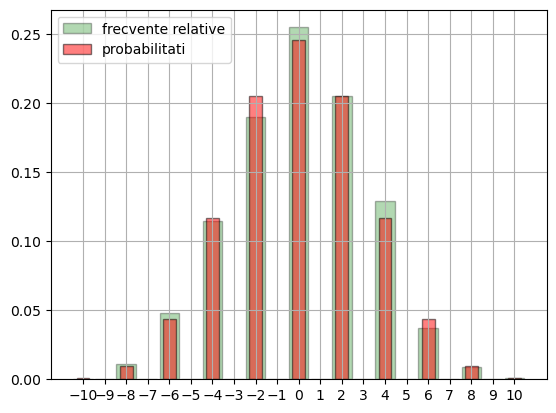

In [42]:
sim_mers_aleator_axa(10,0.5)  # 10 - nr par de pasi si 11 - nr impar de pasi

In [43]:
def sim_mers_aleator_cerc(nr_pasi,nr_pcte,p,nr_sim=1000):
    pozitii_finale = [mers_aleator_axa(nr_pasi,p)[-1] % nr_pcte for _ in range(nr_sim)]

#  Operatorul % (modulo) calculează restul împărțirii ultimei poziții a punctului la nr_pcte.
    
    bin_edges = [i+0.5 for i in range(-1,nr_pcte)]
    hist(pozitii_finale, bin_edges, density = True, rwidth=0.9, align = 'mid',
      edgecolor='black', color = 'green', alpha = 0.3, label='frecvente relative')
    
    distributie = nr_pcte * [0]
    for k in range(nr_pasi):
        distributie[(k-(nr_pasi-k))%nr_pcte]+=binom.pmf(k,nr_pasi,p)

#  Această linie creează o listă distributie de lungime nr_pcte (numărul total de puncte) și o inițializează cu valori de 0.
#  Lista va fi folosită pentru a stoca probabilitățile calculate pentru diferite poziții, conform modelului de deplasare.
#  k - (nr_pasi - k) reprezintă un decalaj sau o deplasare netă, care poate fi pozitivă sau negativă.
#  % nr_pcte: Acest operator modulo limitează această poziție la intervalul [0, nr_pcte - 1], mișcarea se desfășoară pe un spațiu circular

    bar(range(nr_pcte), distributie, width=0.6, align='center',
             edgecolor='black', color='red', alpha=0.5, label='probabilitati')
    
    xticks(range(nr_pcte))
    legend(loc='upper right')
    grid()
    show()

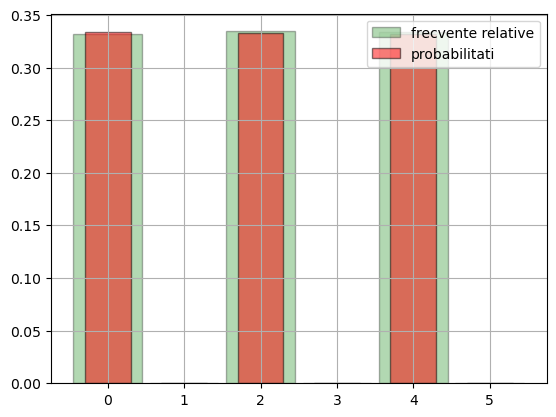

In [47]:
sim_mers_aleator_cerc(10,6,0.5,2000)

# Problema 2

In [49]:
from scipy.stats import hypergeom, geom

In [50]:
nr_sim = 10000

p = sum([hypergeom.pmf(k,49,6,6) for k in range(3,7)])     #  p reprezinta probabilitatea de succes

#  49 nr total de bile din urna;  6 nr de bile extrase;  6 nr. total de bile alese de jucator pe bilet;  k nr. de bile corecte
#  se calc prob p ca un bilet ca un bilet să fie „câștigător,” adică să aibă cel puțin 3 numere corecte din cele 6 extrase.
#  hypergeom.pmf(k, 49, 6, 6) este funcția de masă de probabilitate (PMF) pentru distribuția hipergeometrică, 
#  care modelează probabilitatea de a nimeri exact k numere corecte într-o tragere Loto 6/49.

#  Expresia [hypergeom.pmf(k, 49, 6, 6) for k in range(3, 7)] generează o listă cu probabilitățile pentru cazurile 
#  în care jucătorul a nimerit 3, 4, 5 sau 6 numere corecte.
#  sum(...) face suma acestor probabilități, astfel încât p este probabilitatea ca un bilet să fie câștigător (să aibă cel puțin 3 numere corecte).

nr_bilete_necastigatoare = geom.rvs(p,size = nr_sim)

#  geom.rvs(p, size=nr_sim) generează o listă cu nr_sim valori aleatoare, folosind o distribuție geometrică cu probabilitatea de succes p calculată anterior.
#  Distribuția geometrică este utilizată pentru a modela numărul de bilete necâștigătoare înainte de a obține primul bilet câștigător.
#  Lista nr_bilete_necastigatoare va conține numărul de bilete necâștigătoare pentru fiecare dintre cele nr_sim simulări.

prob_estimata = sum([x>=10 for x in nr_bilete_necastigatoare])/nr_sim

#  Această linie estimează probabilitatea ca jucătorul să aibă cel puțin 10 bilete necâștigătoare la rând înainte de a obține un bilet câștigător.
#  [x >= 10 for x in nr_bilete_necastigatoare] creează o listă de valori booleene (True/False) care indică, pentru fiecare simulare, dacă numărul de bilete necâștigătoare este mai mare sau egal cu 10.
#  sum(...) adună valorile True (considerate ca 1), calculând astfel numărul total de simulări în care jucătorul a avut cel puțin 10 bilete necâștigătoare.

print(f'Probabilitatea estimata: {prob_estimata}')

prob_teoretica=1-geom.cdf(9,p)
print(f'Probabilitatea teoretica: {prob_teoretica}')

#  geom.cdf(9, p) este funcția de distribuție cumulativă (CDF) a distribuției geometrice, care calculează probabilitatea ca numărul de bilete necâștigătoare să fie mai mic sau egal cu 9.
#  1 - geom.cdf(9, p) dă probabilitatea ca jucătorul să aibă 10 sau mai multe bilete necâștigătoare.


Probabilitatea estimata: 0.8406
Probabilitatea teoretica: 0.844238101245036
